In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [3]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
# df.head()

In [4]:
genre={}

for _, row in df.iterrows():
    genre_list=row['listed_in'].split(', ')
    for name in genre_list:
        if name not in genre.keys():
            genre[name]=1
        genre[name]+=1

keys=list(genre.keys())
values=list(genre.values())
sorted_index=np.argsort(values)
sorted_genre={keys[i]:values[i] for i in sorted_index}

df['date_added']=pd.to_datetime(df['date_added'])
df['month']=df['date_added'].dt.month
df['year']=df['date_added'].dt.year

In [5]:
# sorted_genre
# df['type'].value_counts()
# df.isna().sum()
# df.release_year.value_counts()
# df['year'].value_counts()
df.loc[0]

show_id                                                        s1
type                                                        Movie
title                                        Dick Johnson Is Dead
director                                          Kirsten Johnson
cast                                                          NaN
country                                             United States
date_added                                    2021-09-25 00:00:00
release_year                                                 2020
rating                                                      PG-13
duration                                                   90 min
listed_in                                           Documentaries
description     As her father nears the end of his life, filmm...
month                                                         9.0
year                                                       2021.0
Name: 0, dtype: object

In [5]:
directors={}

for _, row in df.iterrows():
    if pd.isna(row['director']):
        continue
    director_list=row['director'].split(', ')
    for name in director_list:
        if name not in directors.keys():
            directors[name]=1
        directors[name]+=1

keys=list(directors.keys())
values=list(directors.values())
sorted_index=np.argsort(values)
sorted_directors={keys[i]:values[i] for i in sorted_index[::-1]}

# sorted_directors
# df['director'].value_counts()

In [6]:
cast={}

for _, row in df.iterrows():
    if pd.isna(row['cast']):
        continue
    cast_list=row['cast'].split(', ')
    for name in cast_list:
        if name not in cast.keys():
            cast[name]=1
        cast[name]+=1

keys=list(cast.keys())
values=list(cast.values())
sorted_index=np.argsort(values)
sorted_cast={keys[i]:values[i] for i in sorted_index[::-1]}

# sorted_cast

In [8]:
# df['country'].value_counts()
# df['rating'].value_counts()

In [7]:
movies=df[df['type']=='Movie']
movies.dropna(subset='duration', inplace=True)
shows=df[df['type']=='TV Show']
shows.dropna(subset='duration', inplace=True)

C:\Users\prach\AppData\Local\Temp\ipykernel_1756\535244065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(subset='duration', inplace=True)
C:\Users\prach\AppData\Local\Temp\ipykernel_1756\535244065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows.dropna(subset='duration', inplace=True)


In [45]:
# movies['dur']=movies['duration'].apply(lambda x:x[:-4])
# movies['dur']=movies['dur'].astype(int)
# shows['dur']=shows['duration'].apply(lambda x:x.split(' ')[0])
# shows['dur']=shows['dur'].astype(int)
# df['dur']=df['duration'].apply(lambda x: x.split(' ')[0] if not pd.isna(x) else None)
# df['dur']=df['dur'].astype(float)

In [11]:
# movies['dur'].describe()
# shows['dur'].describe()

In [8]:
df['dur']=df['duration'].apply(lambda x: x.split(' ')[0] if not pd.isna(x) else None)
df['dur']=df['dur'].astype(float)
# sns.histplot(data=movies, x='dur', binwidth=10, stat="count", legend=True)
# sns.histplot(data=shows, x='dur' )

In [9]:
# sns.countplot(data=df, y='country', orient='v')
country={}

for _, row in df.iterrows():
    if pd.isna(row['country']):
        continue
    country_list=row['country'].split(', ')
    for name in country_list:
        if name not in country.keys():
            country[name]=1
        country[name]+=1

keys=list(country.keys())
values=list(country.values())
sorted_index=np.argsort(values)
sorted_country={keys[i]:values[i] for i in sorted_index[::-1]}

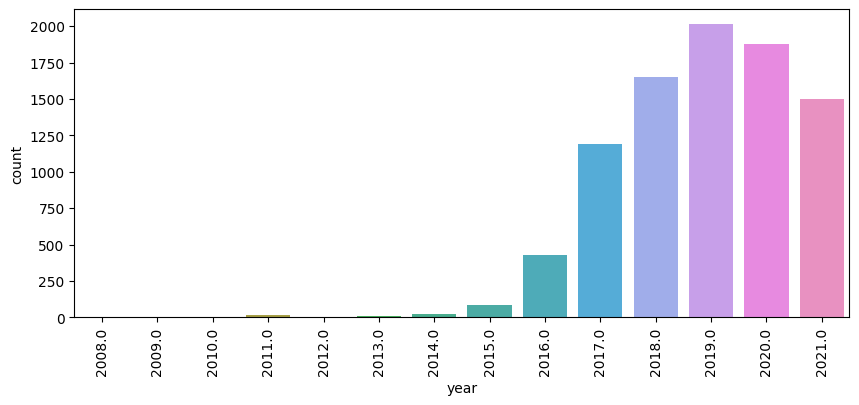

In [10]:
country=pd.DataFrame(sorted_genre, index=['count']).T.reset_index().rename(columns={'index':'country'})

fig, ax=plt.subplots(figsize=(10,4))
# sns.barplot(country, x='country',y='count', orient='v')
sns.countplot(data=df,x='year')
plt.xticks(rotation=90)
plt.show()

In [53]:
df2=df['director'].str.split(', ', expand=True).stack().reset_index()
df2=df2.drop(columns=['level_1']).rename(columns={0:'directors'}).set_index('level_0')
df_ud=df.merge(df2, how='outer', left_index=True, right_index=True)
# df2['index']

In [47]:
# df_ud.reset_index(drop=True, inplace=True)
df2=df_ud['listed_in'].str.split(', ', expand=True).stack().reset_index()
df2=df2.drop(columns=['level_1']).rename(columns={0:'genre'}).set_index('level_0')
df_ud=df_ud.merge(df2,how='outer', left_index=True, right_index=True)

In [48]:
# df_ud.drop(columns=['show_id','title','director','cast','date_added','duration','listed_in','description'], inplace=True)
df_ud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26590 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       26590 non-null  object        
 1   type          26590 non-null  object        
 2   title         26590 non-null  object        
 3   director      20706 non-null  object        
 4   cast          24103 non-null  object        
 5   country       24506 non-null  object        
 6   date_added    26570 non-null  datetime64[ns]
 7   release_year  26590 non-null  int64         
 8   rating        26584 non-null  object        
 9   duration      26587 non-null  object        
 10  listed_in     26590 non-null  object        
 11  description   26590 non-null  object        
 12  month         26570 non-null  float64       
 13  year          26570 non-null  float64       
 14  dur           26587 non-null  float64       
 15  directors     20706 non-null  object 

In [44]:
df_ud['type']=df_ud['type'].apply(lambda x: 1 if x=='Movie' else 0)
label_encoder_c=preprocessing.LabelEncoder()
df_ud['country']=label_encoder_c.fit_transform(df_ud['country'])
label_encoder_rating=preprocessing.LabelEncoder()
df_ud['rating']=label_encoder_rating.fit_transform(df_ud['rating'])
label_encoder_dir=preprocessing.LabelEncoder()
df_ud['directors']=label_encoder_dir.fit_transform(df_ud['directors'])
label_encoder_g=preprocessing.LabelEncoder()
df_ud['genre']=label_encoder_g.fit_transform(df_ud['genre'])

C:\Users\prach\AppData\Local\Temp\ipykernel_1756\2298052564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ud.corr().abs(), cmap='RdYlGn')


<AxesSubplot: >

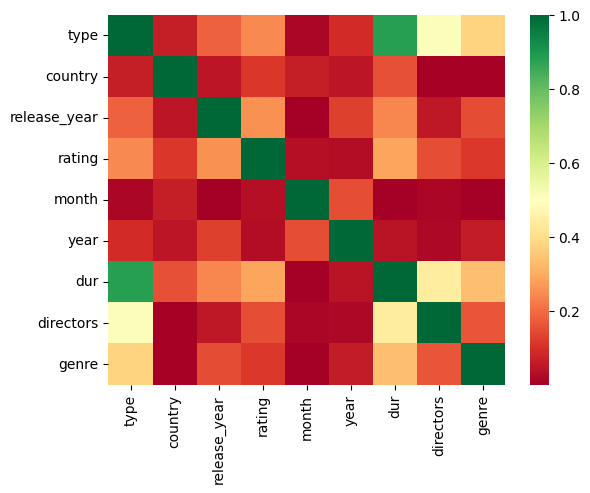

In [45]:
sns.heatmap(df_ud.corr().abs(), cmap='RdYlGn')
# df_ud['type'].value_counts()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

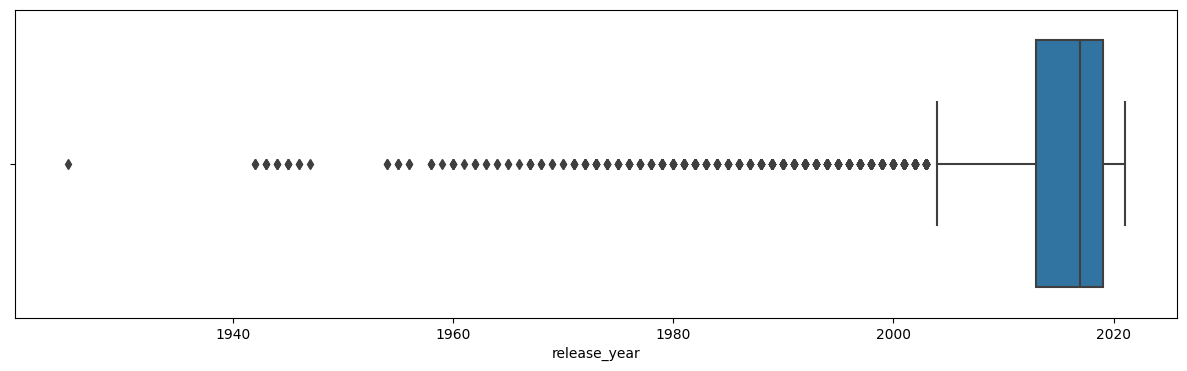

In [78]:
# df_ud['show_id'].value_counts()
# df_ud[df_ud['show_id']=='s5888']
fig, ax=plt.subplots(figsize=(15,4))
sns.boxplot(x=df['release_year'])
# df[df['dur']>250]
df['release_year'].describe()

In [79]:
movies['country'].value_counts()

United States                            2055
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 651, dtype: int64

In [80]:
shows['country'].value_counts()

United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64

In [85]:
directors={}

for _, row in shows.iterrows():
    if pd.isna(row['director']):
        continue
    director_list=row['director'].split(', ')
    for name in director_list:
        if name not in directors.keys():
            directors[name]=1
        directors[name]+=1

keys=list(directors.keys())
values=list(directors.values())
sorted_index=np.argsort(values)
sorted_directors={keys[i]:values[i] for i in sorted_index[::-1]}

# sorted_directors
# df['director'].value_counts()

In [91]:
# len(directors)
# temp=sorted_directors
# common=[name for name in directors.keys() if name in temp.keys()]
len(common)

83

In [96]:
cast={}

for _, row in shows.iterrows():
    if pd.isna(row['cast']):
        continue
    cast_list=row['cast'].split(', ')
    for name in cast_list:
        if name not in cast.keys():
            cast[name]=1
        cast[name]+=1

keys=list(cast.keys())
values=list(cast.values())
sorted_index=np.argsort(values)
sorted_cast={keys[i]:values[i] for i in sorted_index[::-1]}

In [98]:
common=[name for name in cast.keys() if name in temp.keys()]
len(common)
# temp=sorted_cast

4375

In [105]:
# sorted_country
# movies['duration'].value_counts()
df['dur'].max()

312.0

In [119]:
genre={}

for _, row in movies.iterrows():
    genre_list=row['listed_in'].split(', ')
    for name in genre_list:
        if name not in genre.keys():
            genre[name]=1
        genre[name]+=1

keys=list(genre.keys())
values=list(genre.values())
sorted_index=np.argsort(values)
sorted_genre={keys[i]:values[i] for i in sorted_index}

In [120]:
# sns.boxplot(x=shows['release_year'])
# shows.info()
sorted_genre

{'Movies': 55,
 'Faith & Spirituality': 66,
 'Cult Movies': 72,
 'Anime Features': 72,
 'LGBTQ Movies': 103,
 'Classic Movies': 117,
 'Sports Movies': 220,
 'Sci-Fi & Fantasy': 244,
 'Stand-Up Comedy': 344,
 'Horror Movies': 358,
 'Music & Musicals': 376,
 'Thrillers': 578,
 'Romantic Movies': 617,
 'Children & Family Movies': 642,
 'Independent Movies': 757,
 'Action & Adventure': 860,
 'Documentaries': 870,
 'Comedies': 1675,
 'Dramas': 2428,
 'International Movies': 2753}